---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.6 - Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_LR.csv?raw=True",
                 index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


**Definition of columns:**

- `location` - address of the house for sale
- `district` - district where the house is located
- `rooms` - number of rooms
- `size` - house area (sq.m)
- `level` - level(floor) where the house located
- `max_levels` - total number of levels
- `price` - price of the house

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7278.0,2.578318,1.030179,1.0,2.0,2.0,3.0,8.0
size,7278.0,70.118980,29.321200,1.0,50.0,65.0,83.0,279.0
level,7278.0,3.689338,2.228360,1.0,2.0,3.0,5.0,18.0
max_levels,7278.0,5.992718,2.583194,1.0,4.0,5.0,9.0,25.0
price,7278.0,54092.074196,29665.210900,2.0,34800.0,45500.0,65000.0,220000.0


In [5]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

We try to predict the price of houses in *Chilonzor* district.

In [6]:
housing = df[df['district']=='Чиланзарский']
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


Let's see if there's a linear relationship between `size` and `price`:

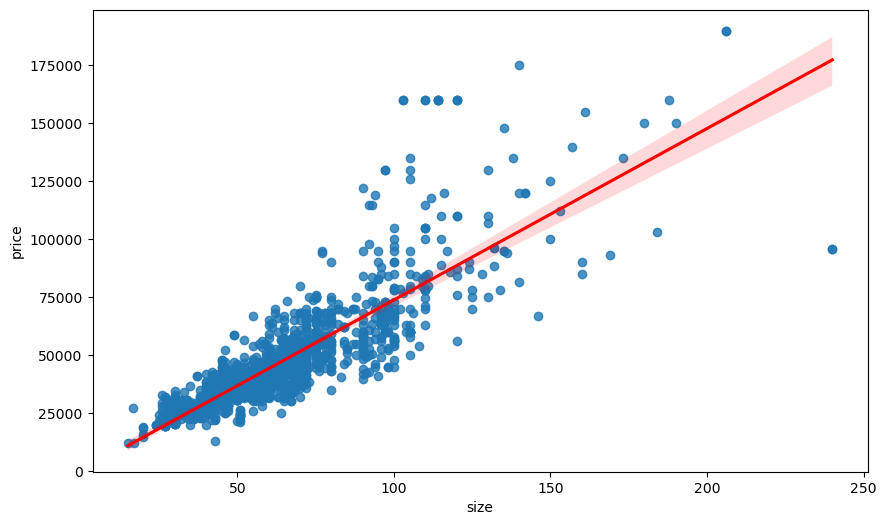

In [23]:
plt.figure(figsize=[10, 6])
sns.regplot(data=housing, x='size', y='price', line_kws={'color':'red'});

We can see clearly that linear relationship.

In [8]:
x = housing['size']
x

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [9]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

### Task 1

Your task is to calculate the coefficients $\theta_0$ and $\theta_1$ using the following formula with `x` and `y`.
$$
\theta_1 = \frac{\sum_{i=1}^S(x_i - \tilde{x})(y_i - \tilde{y})}{\sum_{i=1}^S(x_i-\tilde{x})^2} \\~\\
\theta_0 = \bar{y} - \theta_1\cdot \tilde{x}
$$
Here $\tilde{x}$ is the mean for `X`, $\tilde{y}$ is the mean for `y`.

In [10]:
theta1 = sum((x-x.mean()) * (y-y.mean())) / sum((x-x.mean())**2)
theta0 = y.mean() - theta1 * x.mean()

In [11]:
print("theta1:", theta1)
print("theta0:", theta0)

theta1: 740.0264822713287
theta0: -195.94911352690542


### Task 2

Extract several random values from `x` and calculate the corresponding `y` using the coefficients.
$$\hat{y} = \theta_0 + \theta_1 \cdot x_1$$

In [12]:
y_pred = theta0 + theta1 * x
pd.DataFrame({'Prediction':y_pred, 'Real':y})

,Prediction,Real
2,30885.163142,37000.0
3,47905.772234,49500.0
4,51605.904645,55000.0
5,20524.792390,25500.0
6,22004.845355,21200.0
...,...,...
7404,51605.904645,48000.0
7422,14604.580532,18500.0
7433,23484.898319,28000.0
7445,51605.904645,49800.0


### Task 3

Calculate RMSE (root mean square error), MAE (mean absolute error) between *predicted*(calculated) and real values.

$$
\text{MAE}(\textbf{x},h) = \frac{1}{m} \sum_{i=1}^m |h(\textbf{x}^i) - y^i|  \\~\\
\text{RMSE}(\textbf{x},h) = \sqrt{\frac{1}{m} \sum_{i=1}^m (h(\textbf{x}^i) - y^i)^2}
$$

In [13]:
MAE = sum(abs(y_pred - y)) / len(x)
RMSE = np.sqrt(sum((y_pred - y)**2) / len(x))

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 7393.754003106559
RMSE: 12198.47778463384


### Linear Regression with scikit-learn

In [14]:
print(f'{housing.shape=}')

housing.shape=(1616, 6)


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

#### Task 1 - Finding Coefficients

In [16]:
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

In [17]:
from sklearn import linear_model

LR_model = linear_model.LinearRegression()
# Traning the model
LR_model.fit(x_train, y_train)

# extracting coefficients
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(f'{theta1=}')
print(f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


#### Task 2 - Prediction

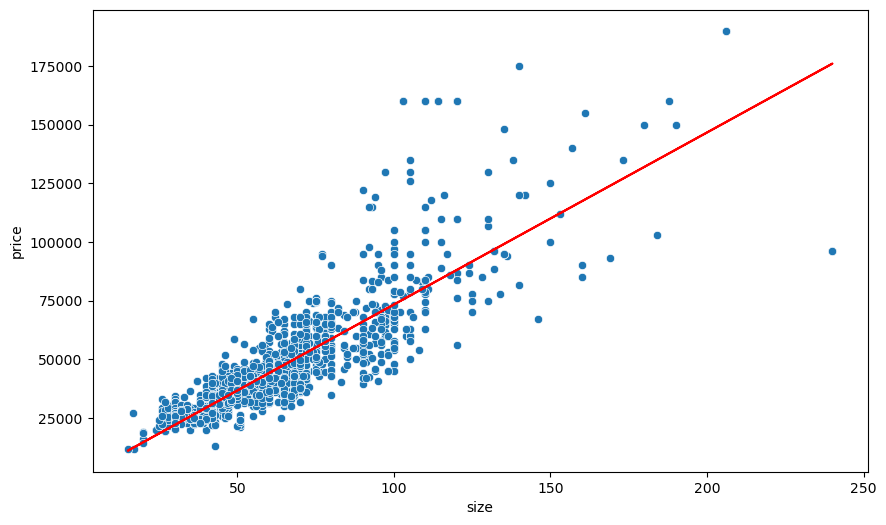

In [18]:
y_pred = theta1 * x_train + theta0

plt.figure(figsize=[10, 6])
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, y_pred, '-r');

#### Task 3 - Evaluation

In [19]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [20]:
y_prediction = LR_model.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction))

print(f'{MAE=}')
print(f'{RMSE=}')

MAE=7269.709648262382
RMSE=12734.803748258666
